# Tutorial 1b: Lagrange dynamics with non-conservative forces
**Aim:** To incorporate non-conservative forces into a dynamic model.

Previously, we simulated a double pendulum swinging freely. Now we're going to add a force acting on the end in an arbitrary direction, and a control torque acting at joint 2:
<img src = "pendulum_force2.png" width = "250">

In [1]:
#Code from last time

# import libraries
import sympy as sym
import numpy as np

from IPython.display import display #for pretty printing

# create symbolic variables

# system parameters
X0,Y0 = sym.symbols(['X0','Y0']) # fixed position of first link
g = sym.symbols('g')
m1,m2 = sym.symbols(['m1','m2']) # mass of links
l1,l2 = sym.symbols(['l1','l2']) # length of links
In1,In2 = sym.symbols(['In1','In2']) # moment of intertia of links

# generalized coordinates
th1,th2 = sym.symbols(['theta1','theta2']) #position
dth1,dth2 = sym.symbols(['\dot{\\theta}_{1}','\dot{\\theta}_{2}']) #velocity
ddth1,ddth2 = sym.symbols(['\ddot{\\theta}_{1}','\ddot{\\theta}_{2}']) #acceleration

q = sym.Matrix([[th1],[th2]]) #group into matrices
dq = sym.Matrix([[dth1],[dth2]])
ddq = sym.Matrix([[ddth1],[ddth2]])

# STEP 1: write expressions for the system space coordinates in terms of the generalized coordinates and parameters
th1a = th1 #absolute angle
th2a = th2 + th1 

x1 = X0 + 0.5*l1*sym.sin(th1a)
y1 = Y0 - 0.5*l1*sym.cos(th1a)

x2 = X0 + l1*sym.sin(th1a) + 0.5*l2*sym.sin(th2a)
y2 = Y0 - l1*sym.cos(th1a) - 0.5*l2*sym.cos(th2a)

# STEP 2: generate expressions for the system space velocities
p1 = sym.Matrix([x1,y1,th1])
[dx1,dy1,dth1a] = p1.jacobian(q)*dq

p2 = sym.Matrix([x2,y2,th2a])
[dx2,dy2,dth2a] = p2.jacobian(q)*dq

display(dx2)

# STEP 3: generate expressions for the kinetic and potential energy

T = sym.Matrix([0.5*m1*(dx1**2+dy1**2) + 0.5*m2*(dx2**2+dy2**2) + 0.5*In1*dth1a**2 + 0.5*In2*dth2a**2])
V = sym.Matrix([m1*g*y1 + m2*g*y2])

# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(1,len(q))
for i in range(len(q)):
    dT_ddq = sym.diff(T,dq[i]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = T.jacobian(q) # partial of T in q

# term 4
Lg4 = V.jacobian(q) # partial of U in q

\dot{\theta}_{1}*(l1*cos(theta1) + 0.5*l2*cos(theta1 + theta2)) + 0.5*\dot{\theta}_{2}*l2*cos(theta1 + theta2)

## Generalized Forces
When no external forces act, the equations of motion are given by the formula:
$$\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{q_i}}\right)
-\frac{d}{dt}\left(\frac{\partial V}{\partial \dot{q_i}}\right)
-\frac{\partial T}{\partial q_i}
+\frac{\partial U}{\partial q_i}=0$$

Non-conservative forces are represented by the *generalized force* $Q_i$, which fits in on the other side of that equation:
$$\frac{d}{dt}\left(\frac{\partial T}{\partial \dot{q_i}}\right)
-\frac{d}{dt}\left(\frac{\partial V}{\partial \dot{q_i}}\right)
-\frac{\partial T}{\partial q_i}
+\frac{\partial U}{\partial q_i}=Q_i$$

### Generalized Force?###

The generalized forces are a mapping of the external forces acting on the system into the generalized coordinates. We can think of them as a set of forces in the directions of the generalized coordinates that has an equivalent combined effect to the external forces.

Here, "equivalent" means "a set of forces that does the same work".

We know work is the product of a force and the displacement over which it moves the system: $W = F \Delta x$.

In an unconstrained system, the displacement of the body will simply coincide with the direction of the force, but this is not always the case for constrained systems. For example, consider a simplified version of the (unit length) pendulum system acted on by a horizontal force: 

<img src = "pendulum.png" width = "250">

The direction of the force is best expressed in terms of the world-frame $x$ axis, but the point at which the force acts is constrained to move in a circle around the fixed axel, so the direction it actually moves in is dependent on the current angle of the pendulum $\theta$. When the pendulum is at 0 degrees, the direction of motion instantaneously matches the direction of the force, but when it's at 90 degrees, it can't move horizontally at all, so no work can be done in that instant. 

To deal with this position dependence, it's helpful to introduce the idea of _virtual work_ - the instantaneous work being done by the force. We express this in terms of a _virtual displacement_ as follows:
$$\delta W = F \delta x$$.

The work and displacement are "virtual" because they can't physically exist: a force can only displace a body (and therefore, do work) by acting over time, so no actual displacement or work can happen in an infinitesimal instant. The virtual displacement is therefore more of an indication of the direction that the system is instantaneously being moved in, while the virtual work expresses how closely that direction aligns to the direction of the force.

In this pendulum example, an infinitesimal movement of the system in the positive direction of the force looks like this:

<img src = "virtual_displacement.png" width = "250">

The position of the pendulum end in the world frame $x$ direction is:
$$x + \delta x = \mathrm{sin}(\theta + \delta \theta)$$

Using the compound angle identity, this can be expanded to:
$$x + \delta x = \mathrm{sin}(\theta)\mathrm{cos}(\delta \theta) + \mathrm{cos}(\theta)\mathrm{sin}(\delta \theta)$$

Because the virtual displacement $\delta \theta$ is negligibly small, we can use the small angle theorem to substitute $\mathrm{cos}(\delta \theta) = 1$ and $\mathrm{sin}(\delta \theta) = \delta \theta$, giving:
$$x + \delta x = \mathrm{sin}(\theta) + \mathrm{cos}(\theta)\delta \theta$$.

Clearly, this can be split into the current position
$$x = \mathrm{sin}(\theta)$$
and the virtual displacement
$$\delta x = \mathrm{cos}(\theta)\delta \theta$$.

This is a simple case where we are mapping a single direction to another, but this will typically be a mapping from vector to vector, of the form:
$$\mathbf{\delta x} = \mathbf{J} \mathbf{\delta q}$$
where $\mathbf{\delta x}$ is the generalized displacement vector expressed in the coordinates describing the external force, and $\mathbf{\delta q}$ is the generalized displacement of the generalized coordinates. The matrix $J$ that maps one coordinate frame to another is called the _Jacobian_.

You probably encountered the term "Jacobian" in maths before, as a matrix of partial derivatives. In this example, the Jacobian has just one element - $\mathrm{cos}(\theta)$ - but looking at the expression for $x$, we see that it is indeed the partial derivative $\frac{\delta x}{\delta \theta}$.

Now let's go back to the virtual work. Remember, what we're trying to do is find a new _generalized_ force $Q$, acting in the direction of our generalized coordinate, that produces equivalent virtual work, that is $\delta W = F \delta x = Q \delta q$.

Here, $\delta W = F \mathrm{cos}(\theta) \delta \theta$, so our generalized force must be $Q = F \mathrm{cos}(\theta)$.

Generalizing this to the vector case, we are actually getting the virtual work by calculating the dot product of a force vector $f$ and virtual displacement vector:
$\mathbf{\delta W} = \mathbf{f} \cdot \mathbf{\delta x}$.
Or, $\mathbf{\delta W} = \mathbf{f} \cdot \mathbf{J} \mathbf{\delta q}$.

This is the same as saying $\mathbf{\delta W} = \mathbf{J}^T \mathbf{f} \cdot \mathbf{\delta q}$, meaning $\mathbf{Q} = \mathbf{J}^T \mathbf{f}$.

Considering that the Jacobian mapped the generalized displacement from the generalized coordinate representation to the coordinates of the force vector, it makes a sort of intuitive sense that the transpose of the Jacobian maps the forces from their original coordinates to the generalized ones.

### Calculating the Jacobian ###
The Jacobian is an extremely important tool - a sort of 'Rosetta Stone' we use to translate vector quantities between coordinate representations. This means that we can use any vector quantity we know how to express in both sets of coordinates to find the Jacobian.

In the pendulum example we just looked at, we could have found the Jacobian by first writing the world-frame position of the pendulum end in terms of the generalized coordinates
$$x = \mathrm{sin}(\theta)$$
and then finding the derivative in $\theta$:
$$\frac{\delta x}{\delta \theta} = \mathrm{cos}(\theta)$$

More generally, you would find the partial derivative of the expressions for each force-frame coordinate in each generalized coordinate.

### TL;DR ###
It's often convenient to use coordinates other than the generalized ones to describe the forces acting on the system. We use a matrix called the Jacobian to map vector quantities such as displacements and forces into the generalized coordinates.

### Example 1: force on end
Now we can go back to the full-scale double pendulum system.

We'll describe the force in terms of the world frame coordinates:
$$\mathbf{f} = \begin{pmatrix} F_x \\ F_y \end{pmatrix}$$

To find the Jacobian, we need to find a vector where we know the relationship between the world frame and generalized coordinate expressions. The position of the end of the pendulum is a good candidate:

$$\mathbf{x} = \begin{pmatrix} 
X_0 + l_1 sin(\theta_1) + l_2 sin(\theta_1+\theta_2) \\ 
Y_0 - l_1 cos(\theta_1) - l_2 cos(\theta_1+\theta_2) \end{pmatrix}$$

We then get the Jacobian by finding the partial derivatives:
$$J = \begin{pmatrix}
\frac{\partial r_x}{\partial \theta_1} & \frac{\partial r_x}{\partial \theta_2}\\
\frac{\partial r_y}{\partial \theta_1} & \frac{\partial r_y}{\partial \theta_2}\\
\end{pmatrix}
= \begin{pmatrix}
l_1 cos(\theta_1) + l_2 cos(\theta_1 + \theta_2) & l_2 cos(\theta_1 + \theta_2)\\
l_1 sin(\theta_1) + l_2 sin(\theta_1 + \theta_2) & l_2 sin(\theta_1 + \theta_2) \end{pmatrix}$$

The generalized force in both coordinates is given by $\mathbf{J}^T \mathbf{f}$
$$Q = \begin{pmatrix} F(l_1 cos(\theta_1) + l_2 cos(\theta_1 + \theta_2))\\
F(l_2 cos(\theta_1 + \theta_2)) \end{pmatrix}$$

### Example 2: Torque
The main takeaway that I hope you get from this section is that you can choose whichever coordinates are most convenient to represent the forces in the system. In Example 1, it made sense to use something other than the generalized coordinates, but often - especially in the case of the joint actuators - the forces can be expressed directly in these coordinates.

The torque acting on the second link of the pendulum is an example. It just acts in the direction $\theta_2$ so there is no need for a cross-coordinate mapping, but this is what one would looks like for the sake of completeness:

Force vector:
$$F = \begin{pmatrix} 0 \\ \tau \end{pmatrix}$$

position vector:
$$F = \begin{pmatrix} 0 \\ \theta_2 \end{pmatrix}$$

Jacobian:
$$J = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$$

Generalized force:
$$Q = \begin{pmatrix} 0 \\ \tau \end{pmatrix}$$


In [6]:
# STEP 5: calculate generalized forces
# arbitrary force
Fx, Fy = sym.symbols(['Fx','Fy'])

FF = sym.Matrix([[Fx],[Fy]])

# end position in force coordinates wrt generalized coordinates:
x = sym.Matrix([[X0 + l1*sym.sin(th1) + l2*sym.sin(th1 + th2)],
                [Y0 - l1*sym.cos(th1) - l2*sym.cos(th1 + th2)]])

JF = x.jacobian(q) # the jacobian

QF = JF.transpose()*FF

# control torque
tau = sym.symbols('tau')

Qtau = sym.Matrix([[0],[tau]])

Qall = QF + Qtau

# put it all together
EOM = Lg1 - Lg3 + Lg4 - Qall.transpose()

## Test
Forward simulate the pendulum from rest in the [0,0] position with A) the force and B) the torque varying according to $5 sin(8\pi t)$. The force is fixed to the $x$ direction.

In [8]:
N = 100

#forces
h = 0.01
t = np.arange(0,N*h,h)

#F_arr = 5*np.sin(8*np.pi*t) #option A
# tau_arr = np.zeros(np.shape(t))

tau_arr = 5*np.sin(8*np.pi*t) #option B
F_arr = np.zeros(np.shape(t))


#initial conditions
th10 = 0
th20 = 0
dth10 = 0
dth20 = 0

#parameters
X0val = 0
Y0val = 2
l1val = 1
l2val = 1

parameter_values = [(X0,X0val),(Y0,Y0val),(g,9.81),(m1,1),(m2,1),(l1,l1val),(l2,l2val),(In1,0.08),(In2,0.08)]

th1ar = [th10]
th2ar = [th20]
dth1ar = [dth10]
dth2ar = [dth20]

for i in range(1,N):
    # substitute parameter values and previous conditions into the EOM 
    past = [(th1,th1ar[i-1]),(th2,th2ar[i-1]),(dth1,dth1ar[i-1]),(dth2,dth2ar[i-1])]
    forces = [(Fx,F_arr[i-1]),(tau,tau_arr[i-1]),(Fy,0)]
    EOM_sub = EOM.subs(parameter_values).subs(past).subs(forces)
    
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddth1, ddth2])
    
    # integrate for the next velocity and position    
    dth1ar.append(float(dth1ar[i-1]+h*acc[ddth1]))
    dth2ar.append(float(dth2ar[i-1]+h*acc[ddth2]))
    th1ar.append(float(th1ar[i-1]+h*dth1ar[i]))
    th2ar.append(float(th2ar[i-1]+h*dth2ar[i]))

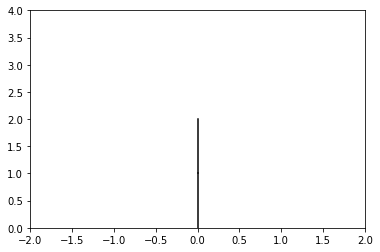

In [9]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes

def plot_pendulum(i,th1_in,th2_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-2,2])
    ax.set_ylim([0,4])
    
    #plot link 1
    L1topx = X0val
    L1topy = Y0val
    L1bottomx = X0val + l1val*np.sin(th1_in[i])
    L1bottomy = Y0val - l1val*np.cos(th1_in[i])
    ax.plot([L1topx,L1bottomx],[L1topy,L1bottomy],color='xkcd:black')
    
    #plot link 2
    L2bottomx = L1bottomx + l2val*np.sin(th1_in[i] + th2_in[i])
    L2bottomy = L1bottomy - l2val*np.cos(th1_in[i] + th2_in[i]) 
    ax.plot([L1bottomx,L2bottomx],[L1bottomy,L2bottomy],color='xkcd:black')
    
update = lambda i: plot_pendulum(i,th1ar,th2ar,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(N),interval = 50,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook